<a href="https://colab.research.google.com/github/LuisaPolicarpo/Hotel/blob/main/Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sqlite3

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/LuisaPolicarpo/Hotel/main/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
[*df]

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
for column in df.columns:
    if df[column].nunique() < 20:
        print(f"\n📂 Column: {column}")
        print("----------------------------")
        for value in df[column].unique():
            print(f"• {value}")
        print("\n" + "="*40)


📂 Column: hotel
----------------------------
• Resort Hotel
• City Hotel


📂 Column: is_canceled
----------------------------
• 0
• 1


📂 Column: arrival_date_year
----------------------------
• 2015
• 2016
• 2017


📂 Column: arrival_date_month
----------------------------
• July
• August
• September
• October
• November
• December
• January
• February
• March
• April
• May
• June


📂 Column: stays_in_weekend_nights
----------------------------
• 0
• 1
• 2
• 4
• 3
• 6
• 13
• 8
• 5
• 7
• 12
• 9
• 16
• 18
• 19
• 10
• 14


📂 Column: adults
----------------------------
• 2
• 1
• 3
• 4
• 40
• 26
• 50
• 27
• 55
• 0
• 20
• 6
• 5
• 10


📂 Column: children
----------------------------
• 0.0
• 1.0
• 2.0
• 10.0
• 3.0
• nan


📂 Column: babies
----------------------------
• 0
• 1
• 2
• 10
• 9


📂 Column: meal
----------------------------
• BB
• FB
• HB
• SC
• Undefined


📂 Column: market_segment
----------------------------
• Direct
• Corporate
• Online TA
• Offline TA/TO
• Complementary
• Groups


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df["country"].describe()

,country
count,118902
unique,177
top,PRT
freq,48590


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
# Connection to a new SQLite database (in memory)
conn = sqlite3.connect(':memory:')

# Load DataFrame into a new table
df.to_sql('hotel_bookings', conn, index=False, if_exists='replace')

119390

In [ ]:
#Total number of bookings per hotel type


query_type = '''
SELECT hotel, COUNT(*) as total_bookings
FROM hotel_bookings
GROUP BY hotel
ORDER BY total_bookings DESC
'''

result = pd.read_sql_query(query_type, conn)
result

,hotel,total_bookings
0,City Hotel,79330
1,Resort Hotel,40060


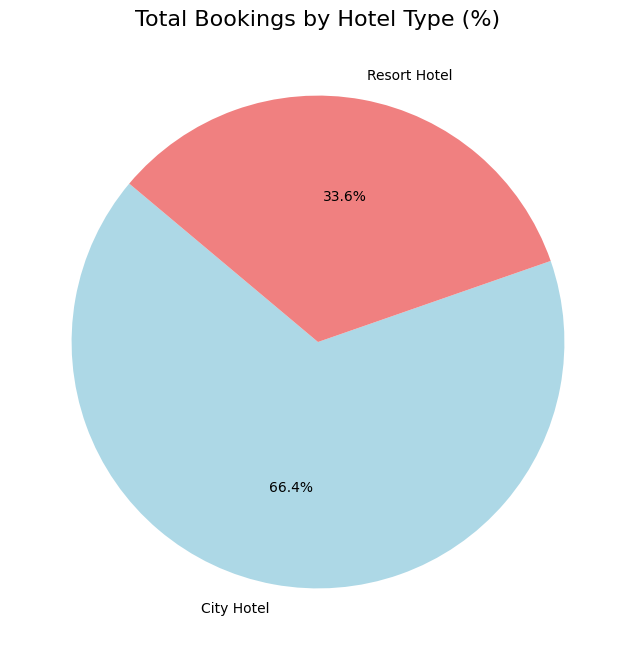

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(result['total_bookings'], labels=result['hotel'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Total Bookings by Hotel Type (%)', fontsize=16)
plt.show()

This analysis shows a clear difference in booking volume between the two hotel types:

- **City Hotel** accounts for a higher proportion of total bookings.
- Differences in customer behavior, stay duration, and cancellation patterns between City and Resort hotels should be considered in operational and marketing strategies.

**Business Insight:**  
Understanding which hotel type drives more volume can help management:
- Prioritize investment in infrastructure and services
- Tailor marketing efforts toward the dominant customer segment
- Adjust pricing strategies based on demand dynamics

In [ ]:
#Average lead time (days between booking and arrival) per hotel type

query_leadtime = '''
SELECT hotel, AVG(lead_time) AS average_lead_time
FROM hotel_bookings
GROUP BY hotel
'''

result_leadtime = pd.read_sql_query(query_leadtime, conn)
result_leadtime

,hotel,average_lead_time
0,City Hotel,109.735724
1,Resort Hotel,92.675686


In [ ]:
#Month has the highest number of bookings

query_month = '''
SELECT arrival_date_month AS Month, COUNT(*) AS total_bookings
FROM hotel_bookings
GROUP BY arrival_date_month
ORDER BY total_bookings DESC
'''

result_month = pd.read_sql_query(query_month, conn)
result_month


,Month,total_bookings
0,August,13877
1,July,12661
2,May,11791
3,October,11160
4,April,11089
5,June,10939
6,September,10508
7,March,9794
8,February,8068
9,November,6794


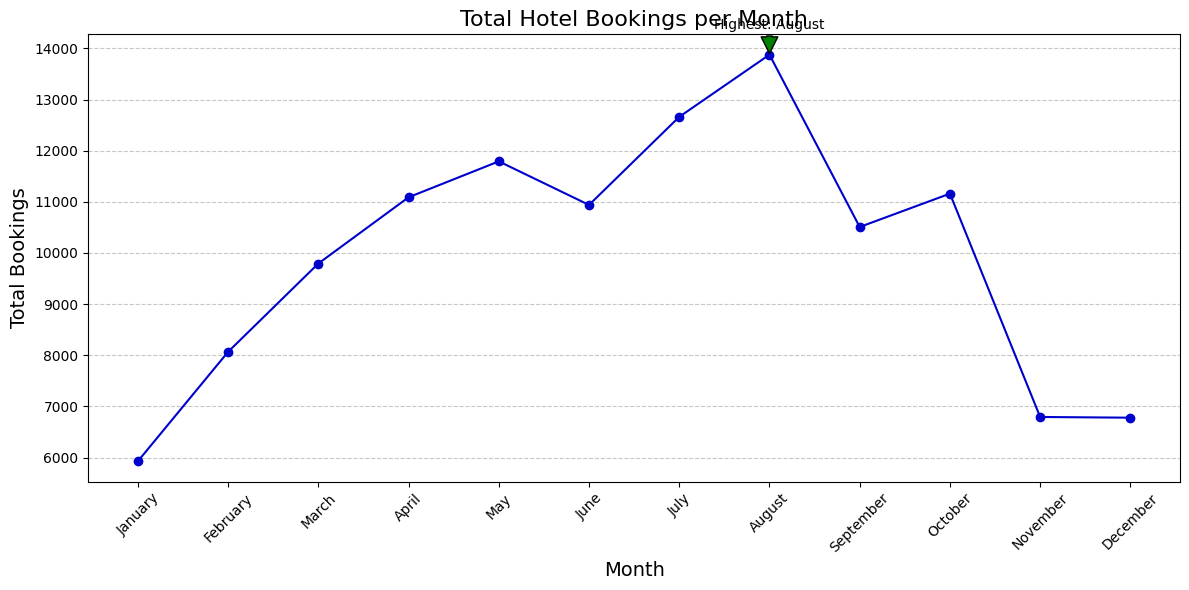

In [ ]:
calendar_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Set Month as index, reorder, then reset index
result_month = result_month.set_index('Month').reindex(calendar_order).reset_index()

# 📈 Create the line plot
plt.figure(figsize=(12,6))
plt.plot(result_month['Month'], result_month['total_bookings'], marker='o', linestyle='-', color='mediumblue')

# Titles and labels
plt.title('Total Hotel Bookings per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Bookings', fontsize=14)

# Rotate month names
plt.xticks(rotation=45)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ✨ Annotate the month with the highest number of bookings
max_idx = result_month['total_bookings'].idxmax()
max_month = result_month.loc[max_idx, 'Month']
max_value = result_month.loc[max_idx, 'total_bookings']

# Add annotation text
plt.annotate(f'Highest: {max_month}',
             xy=(max_idx, max_value),
             xytext=(max_idx, max_value + 500),
             ha='center',
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.tight_layout()
plt.show()

The analysis of monthly hotel bookings reveals clear seasonal patterns:

- The highest number of bookings occurs in **[August]**, suggesting strong demand during this period.
- Booking activity tends to increase during the **summer months** likely due to vacation periods and lower booking volumes are observed in the **winter months**, indicating possible seasonality effects or off-peak travel periods.

Understanding seasonal booking trends can help the hotel management to:
- Optimize pricing strategies
- Allocate staffing and operational resources more efficiently
- Plan marketing campaigns timed to maximize bookings during off-peak seasons

In [ ]:
#Cancellation rate (%) per hotel type

query_cancellation = '''
SELECT
    hotel,
    COUNT(*) AS total_bookings,
    SUM(is_canceled) AS total_cancellations,
    ROUND(SUM(is_canceled) * 100.0 / COUNT(*), 2) AS cancellation_rate_percent
FROM hotel_bookings
GROUP BY hotel
ORDER BY cancellation_rate_percent DESC
'''

result_cancellation = pd.read_sql_query(query_cancellation, conn)
result_cancellation


,hotel,total_bookings,total_cancellations,cancellation_rate_percent
0,City Hotel,79330,33102,41.73
1,Resort Hotel,40060,11122,27.76


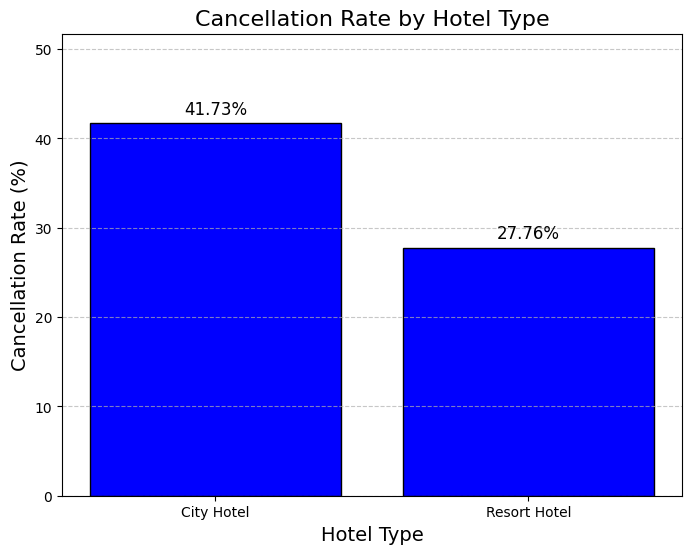

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(result_cancellation['hotel'], result_cancellation['cancellation_rate_percent'], color='blue', edgecolor='black')


plt.title('Cancellation Rate by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=14)


for index, value in enumerate(result_cancellation['cancellation_rate_percent']):
    plt.text(index, value + 1, f'{value}%', ha='center', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, result_cancellation['cancellation_rate_percent'].max() + 10)


plt.show()

The analysis shows that cancellation rates differ significantly between hotel types:

- **City Hotels** have a higher cancellation rate compared to **Resort Hotels**.
- This suggests that guests booking City Hotels might be more prone to last-minute changes, cancellations, or flexible travel plans.
- Resort Hotel guests, on the other hand, may have firmer travel plans leading to lower cancellation rates.


In [ ]:
#Top 5 countries by number of guests

query_top5 = '''
SELECT country, SUM([adults]+[children]+[babies]) as number_guest
FROM hotel_bookings
GROUP BY country
ORDER BY number_guest DESC
LIMIT 5
'''

result_top5 = pd.read_sql_query(query_top5, conn)
result_top5

,country,number_guest
0,PRT,90027.0
1,GBR,24568.0
2,FRA,21579.0
3,ESP,18153.0
4,DEU,14198.0


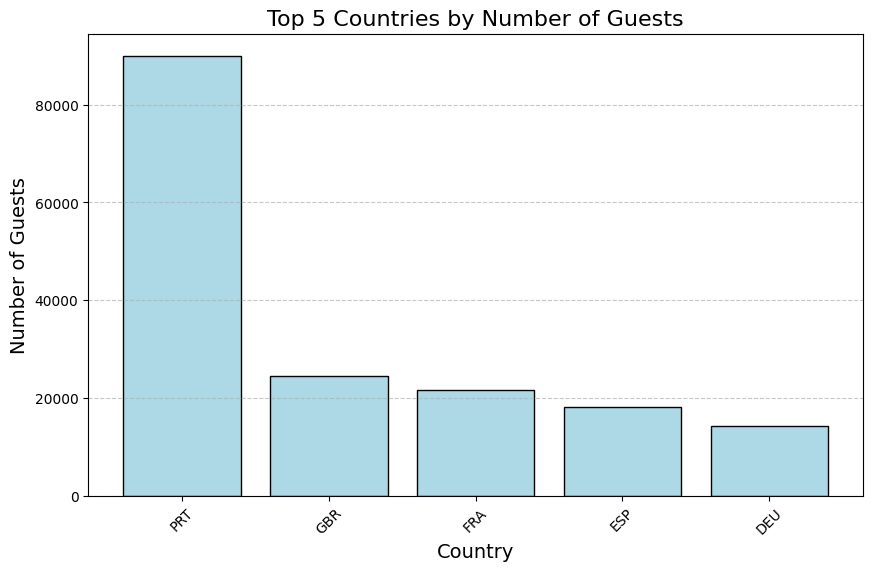

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(result_top5['country'], result_top5['number_guest'], color='lightblue', edgecolor='black')


plt.title('Top 5 Countries by Number of Guests', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Guests', fontsize=14)


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Average total stay length for each hotel type

query_avg = '''
SELECT hotel, SUM ([stays_in_weekend_nights]+ [stays_in_week_nights]) as total_stays
FROM hotel_bookings
GROUP BY hotel
'''

result_avg = pd.read_sql_query(query_avg, conn)
result_avg

,hotel,total_stays
0,City Hotel,236256
1,Resort Hotel,173001


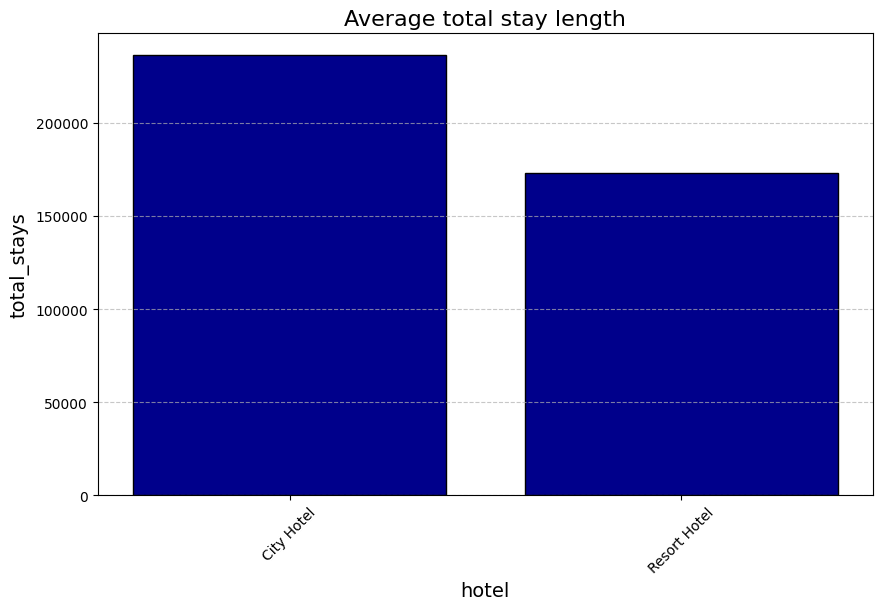

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(result_avg['hotel'], result_avg['total_stays'], color='darkblue', edgecolor='black')


plt.title('Average total stay length', fontsize=16)
plt.xlabel('hotel', fontsize=14)
plt.ylabel('total_stays', fontsize=14)


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

The analysis of the average total stay per hotel type reveals clear differences in guest behavior, since **city hotels** has a longer average stay.



In [ ]:
#Market segment

query_ms = '''
SELECT market_segment, COUNT(*) as total_bookings
FROM hotel_bookings
GROUP BY market_segment
ORDER BY total_bookings DESC
LIMIT 7
'''

result_ms = pd.read_sql_query(query_ms, conn)
result_ms

,market_segment,total_bookings
0,Online TA,56477
1,Offline TA/TO,24219
2,Groups,19811
3,Direct,12606
4,Corporate,5295
5,Complementary,743
6,Aviation,237


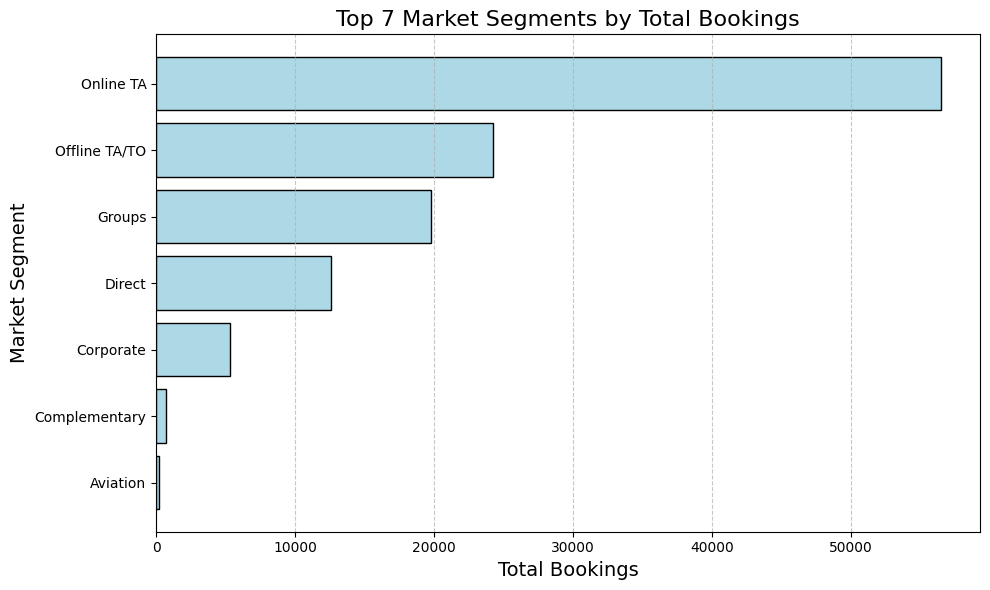

In [ ]:
# Create the horizontal bar plot
plt.figure(figsize=(10,6))
plt.barh(result_ms['market_segment'], result_ms['total_bookings'], color='lightblue', edgecolor='black')

# Titles and labels
plt.title('Top 7 Market Segments by Total Bookings', fontsize=16)
plt.xlabel('Total Bookings', fontsize=14)
plt.ylabel('Market Segment', fontsize=14)

# Grid for cleaner look
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Invert y-axis to have the highest on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

 **Online Travel Agencies** represents the largest source of bookings, as expected. Aviation is the small segment, since it only refers to airline crews.

Understanding the main booking channels helps the hotel management:
- Optimize partnerships and commission agreements with top-performing agencies.
- Design targeted marketing campaigns for high-value segments.
- Diversify acquisition strategies to avoid over-reliance on a single booking channel.

# Conclusion

The analysis of the hotel booking dataset revealed the following business insights:

- **City Hotels** receive a higher number of total bookings compared to **Resort Hotels**. However, Resort Hotel guests tend to have **longer stays**, indicating different guest profiles.
- **Cancellation rates** are significantly higher for City Hotels, suggesting more flexible or uncertain travel patterns among their guests.
- **Booking seasonality** is strong, with peaks during the summer months, particularly in **[August]**, highlighting opportunities for seasonal pricing strategies.
- **Online Travel Agencies** dominate as the main market segment, reinforcing the importance of digital channels in hotel bookings.


**Business Implications:**
- Develop specific marketing strategies for different hotel types based on guest behavior.
- Strengthen partnerships with online travel agencies and airlines to secure a steady booking pipeline.
- Optimize operational planning around observed seasonal trends.

